In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df['culmen_length_mm'] = df['culmen_length_mm'].replace(np.NaN, df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].replace(np.NaN, df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].replace(np.NaN, df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].replace(np.NaN, df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.shape

(344, 7)

In [8]:
x = df.drop('sex', axis=1)
y = df.iloc[:,6].values

x = pd.get_dummies(x, drop_first=True)
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,0,1
...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,1,0,0
340,46.80000,14.30000,215.000000,4850.000000,0,1,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,1,0,0
342,45.20000,14.80000,212.000000,5200.000000,0,1,0,0


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [11]:
y.shape

(344,)

In [12]:
y_pred = classifier.predict(x_test)
print(y_pred)

['MALE' 'MALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE' 'FEMALE' 'MALE'
 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE'
 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'MALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'MALE' 'FEMALE'
 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'FEMALE']


In [13]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x, y)

[Ellipsis]

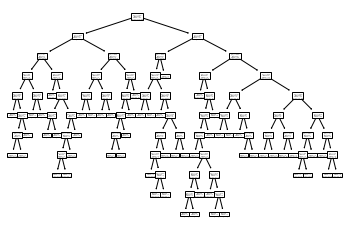

In [14]:
tree.plot_tree(classifier)
[...]

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  4]
 [15 29]]
              precision    recall  f1-score   support

      FEMALE       0.58      0.84      0.69        25
        MALE       0.88      0.66      0.75        44

    accuracy                           0.72        69
   macro avg       0.73      0.75      0.72        69
weighted avg       0.77      0.72      0.73        69

